In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from geopy import distance
import math
import datetime
import random
import os
%matplotlib inline
import seaborn as sns
import seaborngrid
import prep2_utils
from seaborngrid import SeabornGrid

In [2]:
all_train, spray, weather, test, enrich = prep2_utils.load_data()


name: train, rows: 10506, columns: 12, null values: 0

name: spray, rows: 14835, columns: 4, null values: 584

name: weather, rows: 2944, columns: 22, null values: 0

name: test, rows: 116293, columns: 11, null values: 0

name: enrich, rows: 27196, columns: 13, null values: 12324

name: train, date range: 2007-05-29 - 2013-09-26

name: spray, date range: 2011-08-29 - 2013-09-05

name: weather, date range: 2007-05-01 - 2014-10-31

name: test, date range: 2008-06-11 - 2014-10-02

name: enrich, date range: 05/28/2009 12:05:00 AM - 10/09/2007 12:10:00 AM


In [3]:
all_train.shape, spray.shape, weather.shape, test.shape, enrich.shape

((10506, 12), (14835, 4), (2944, 22), (116293, 11), (27196, 13))

In [4]:
print('\nwnv positive date range: {} - {}'.format(
      str(all_train[all_train['WnvPresent'] == 1]['Date'].min()).split()[0], 
      str(all_train[all_train['WnvPresent'] == 1]['Date'].max()).split()[0]))


wnv positive date range: 2007-07-18 - 2013-09-26


79 CULEX PIPIENS/RESTUANS


/Users/aviavidan/anaconda3/envs/TF/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/aviavidan/anaconda3/envs/TF/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'col', 'row'
  s)


82 CULEX PIPIENS
32 CULEX RESTUANS


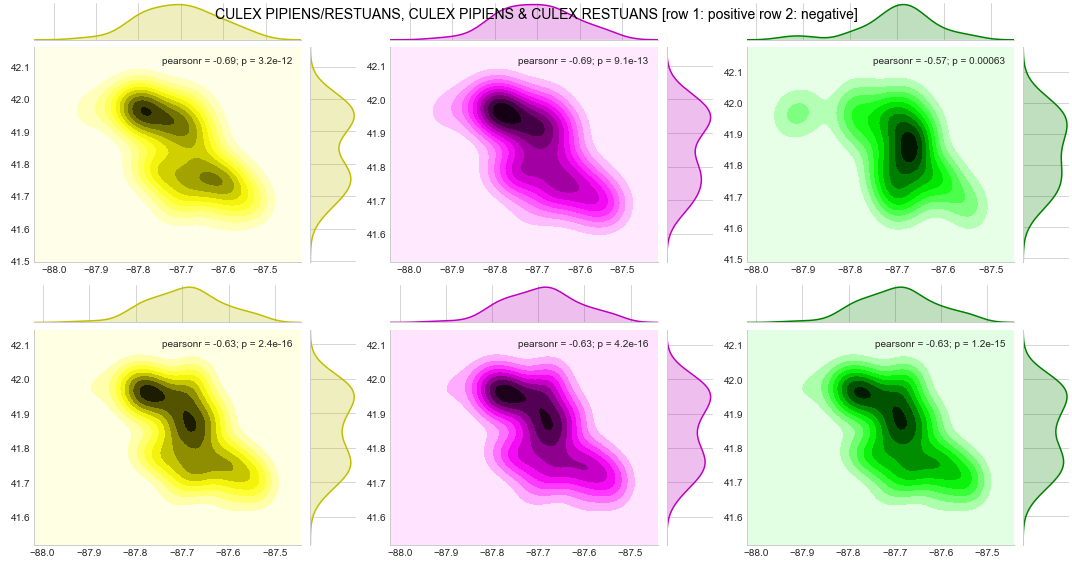

In [5]:
wnv_species = all_train[all_train['WnvPresent'] == 1].Species.unique()
traps = all_train[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent', 'Species']]
wnv_pos = traps[traps['WnvPresent'] == 1][['Longitude', 'Latitude', 'Species']].drop_duplicates()
wnv_neg = traps[traps['WnvPresent'] == 0][['Longitude', 'Latitude', 'Species']].drop_duplicates()
prep2_utils.plot_lat_lng_dist(wnv_species, wnv_pos, wnv_neg)

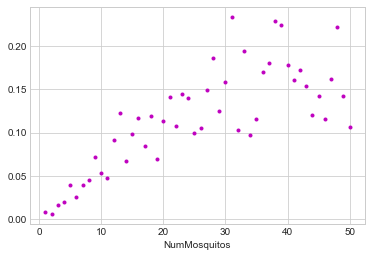

In [6]:
plt_train = all_train.groupby(['NumMosquitos'])['WnvPresent'].mean().plot(style='.', c='m', grid=True)

#### Date Pre-process

In [7]:
y_train = all_train[['WnvPresent']]
# y_train.to_csv('./data/y_train1.csv', columns=y_train.columns.tolist())

#### add weather features and split by station

In [10]:
weather = weather[prep2_utils.weather_cols]
weather_stat1, weather_stat2 = prep2_utils.split_weather_by_station(weather)

#### preprocess_dataset

In [11]:
all_traps = test.Trap.unique().tolist()
final_cols = ['Latitude', 'Longitude', 'Trap', 'AddressAccuracy',                # original features
              'Duplicats', 'day_count', 'day_of_week', 'week', 'month',          # engineered seasonality features
              'ohare_3', 'ohare_5', 'mckin_3', 'mckin_5', 'aubur_3', 'aubur_5',  # engineered location features
              'CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS',       # species features
              'avg_tmp', 'dl_hrs', 'dl_2wks_ago', 'dl_4wks_ago', 'avg_wind',     # engineered weather features
              'PrecipTotal_3wks',                                                # weather features
              'Tavg', 'Tmin', 'Tmax', 'Cool', 'PrecipTotal', 'AvgSpeed', 'WetBulb']  

contiuous_cols = ['avg_tmp', 'dl_hrs', 'avg_wind', 'PrecipTotal_3wks',
                  'Tavg', 'Tmin', 'Tmax', 'Cool', 'PrecipTotal', 'AvgSpeed', 'WetBulb']

discrete_cols = ['AddressAccuracy', 'Duplicats', 'day_of_week', 'month', 'ohare_3', 'ohare_5', 'mckin_3', 
                 'mckin_5', 'aubur_3', 'aubur_5', 'CULEX PIPIENS', 'CULEX RESTUANS']

len(final_cols)

31

In [13]:
print(spray.shape)
spray = spray.drop_duplicates()
spray.drop(['Time'], axis=1, inplace=True)
print(spray.shape)

(14835, 4)
(14294, 3)


In [38]:
csv_list = ['/Users/aviavidan/src/wnv/data/data1_1/x_train1.csv', 
            '/Users/aviavidan/src/wnv/data/data1_1/y_train1.csv',
            '/Users/aviavidan/src/wnv/data/data1_1/x_test1.csv']

train_df, y_train_df, test_df = dexplor_utils.load_preprocessed(csv_list=csv_list)

In [13]:
x_train.shape, y_train.shape, x_test.shape

((10506, 31), (10506, 1), (116293, 31))

In [14]:
x_train.columns.tolist() == x_test.columns.tolist()

True

In [43]:
import prep_utils
oos_dict, mask_out = prep_utils.validate_uniques_vals(test_df, train_df, cols=prep_utils.disc_feat)

print(mask_out.sum())

oos_list = prep_utils.validate_lat_lng(test_df, train_df, cols=prep_utils.cont_feat)


feature:Trap, # uniques in testset:149, # uniques in trainset:136
feature:Trap, # of missing uniques in train:13
[118, 119, 120, 121, 122, 123, 124, 125, 126, 138, 139, 141, 146]

feature:AddressAccuracy, # uniques in testset:4, # uniques in trainset:4
feature:AddressAccuracy, # of missing uniques in train:0

feature:day_count, # uniques in testset:76, # uniques in trainset:77
feature:day_count, # of missing uniques in train:32
[169, 176, 186, 203, 211, 218, 226, 232, 253, 263, 162, 182, 197, 204, 207, 256, 160, 167, 195, 201, 202, 209, 216, 222, 223, 230, 243, 254, 264, 272, 184, 275]

feature:day_of_week, # uniques in testset:5, # uniques in trainset:5
feature:day_of_week, # of missing uniques in train:0

feature:week, # uniques in testset:19, # uniques in trainset:20
feature:week, # of missing uniques in train:0

feature:month, # uniques in testset:5, # uniques in trainset:6
feature:month, # of missing uniques in train:0

feature:CULEX PIPIENS/RESTUANS, # uniques in testset:2, # un

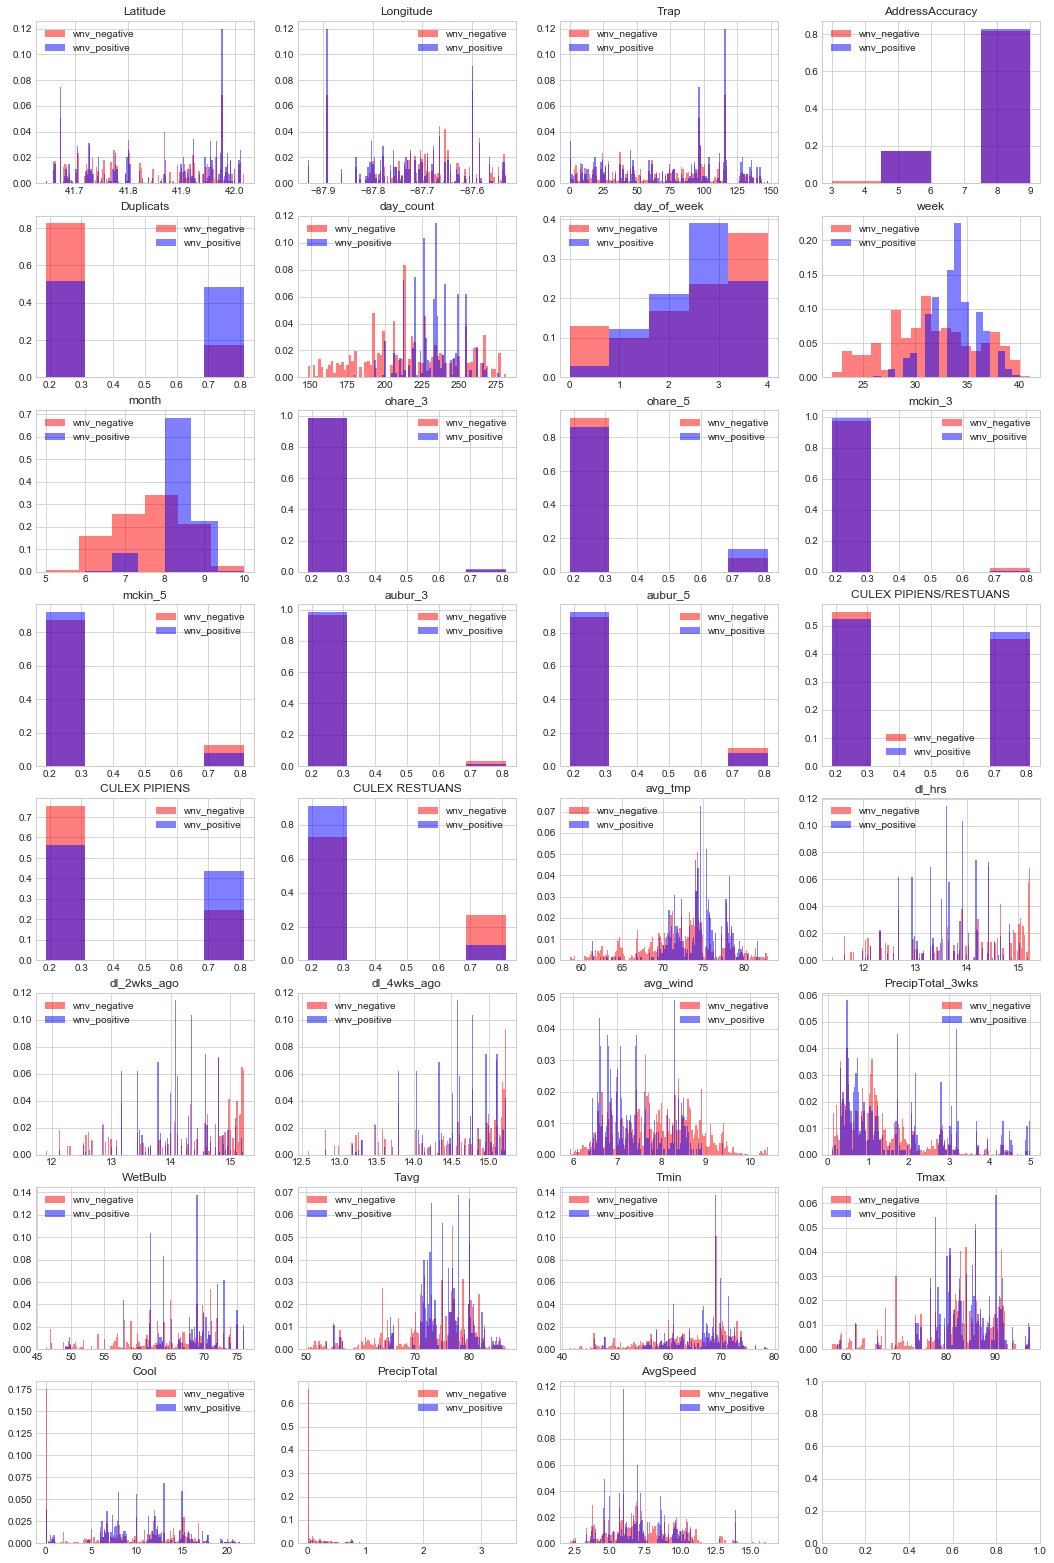

In [42]:
pos_wnv = train_df[y_train_df['WnvPresent'] == 1]
neg_wnv = train_df[y_train_df['WnvPresent'] == 0]
prep_utils.plot_dist_compare(train_df.columns.tolist(), neg_wnv, pos_wnv, ['wnv_negative', 'wnv_positive'], prec=True)

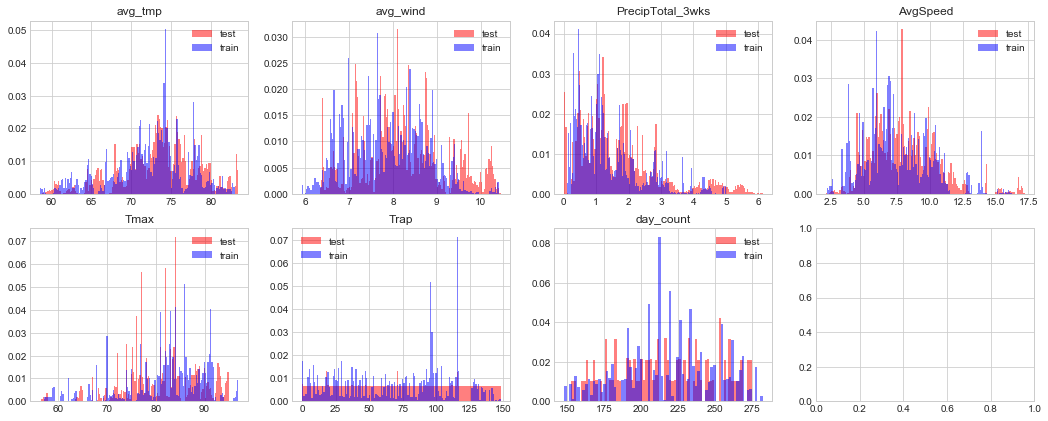

In [44]:
cols_dist_comp = oos_list + list(oos_dict.keys())
prep_utils.plot_dist_compare(cols_dist_comp, test_df, train_df, ['test', 'train'])

In [45]:
df = train_df.merge(all_train[['Date']], how = 'left', right_index = True, left_index = True)
df = df.merge(all_train[['WnvPresent']], how = 'left', right_index = True, left_index = True)

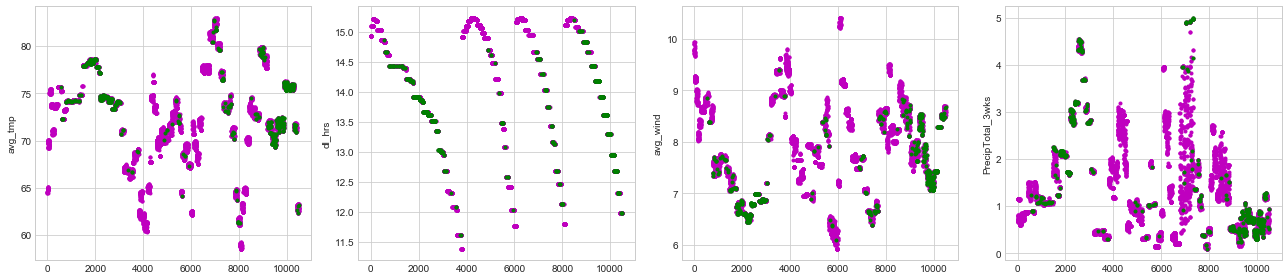

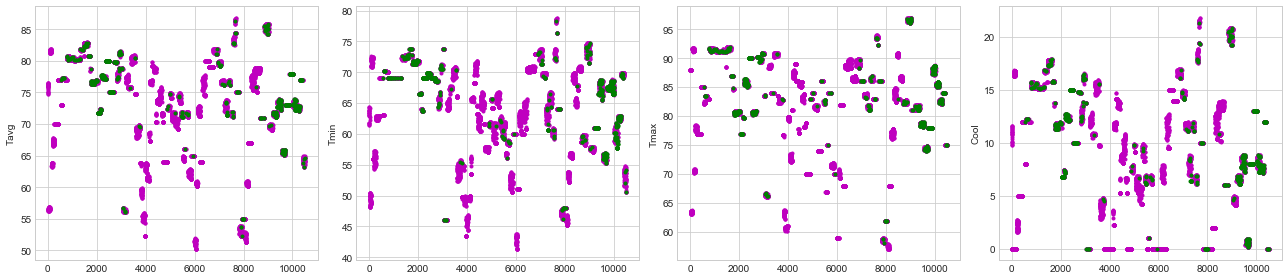

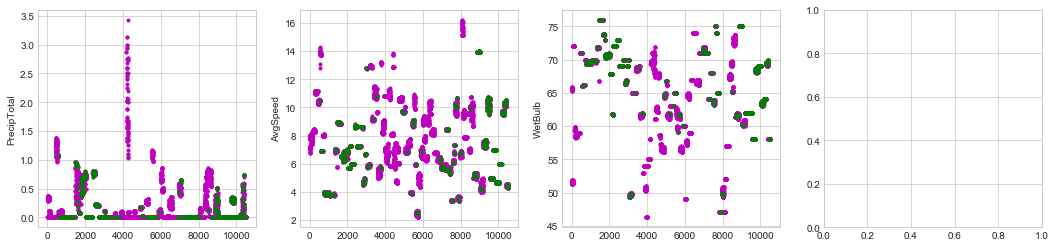

In [46]:
in_row = 4
for i, col in enumerate(contiuous_cols):
    if i%in_row == 0:
        f, ax = plt.subplots(1, in_row, figsize=(18, 4))
    df[col][df['WnvPresent'] == 0].plot(style='.', c='m', grid=True, legend=False, ax=ax[i%in_row])
    df[col][df['WnvPresent'] == 1].plot(style='.', c='g', grid=True, ax=ax[i%in_row])
    ax[i%in_row].set_ylabel(col)
    if i%in_row == in_row-1:
        plt.tight_layout()
        plt.show()

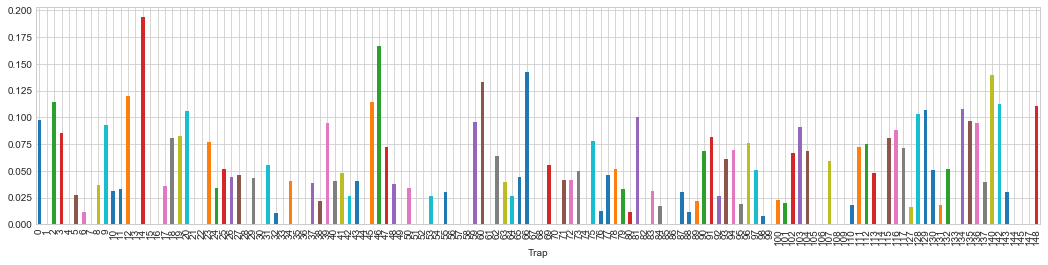

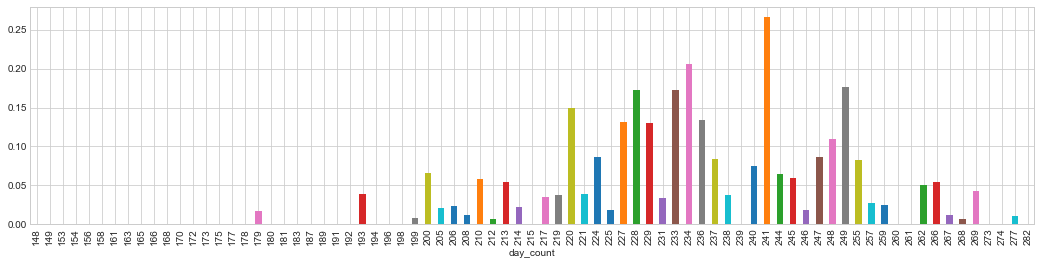

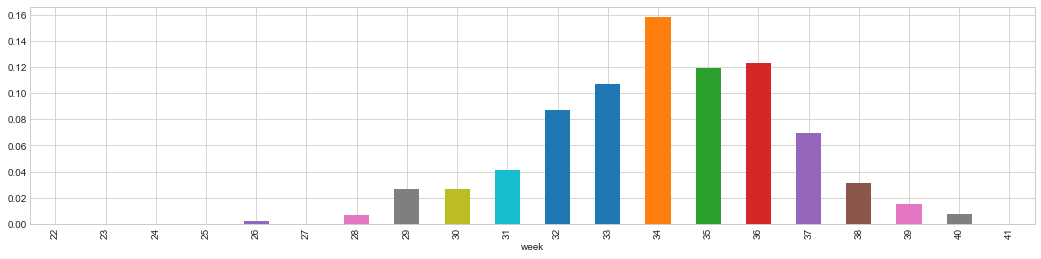

In [17]:
for col in ['Trap', 'day_count', 'week']:
    df.groupby([col])['WnvPresent'].mean().plot.bar(grid=True, figsize=(18, 4))
    plt.show()

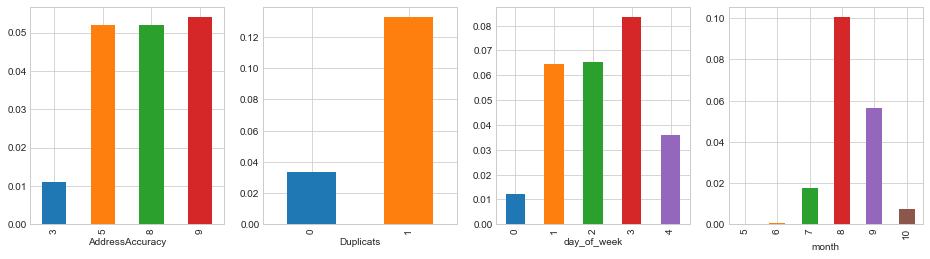

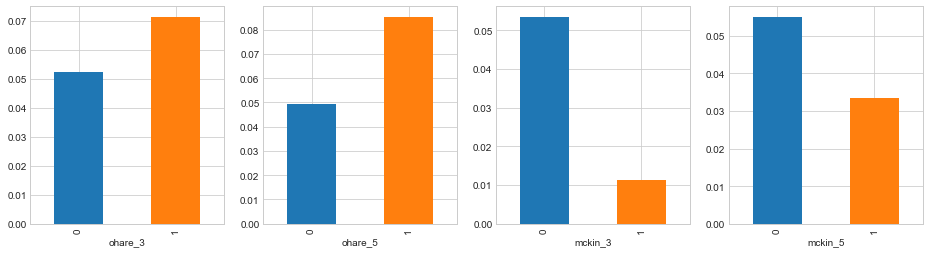

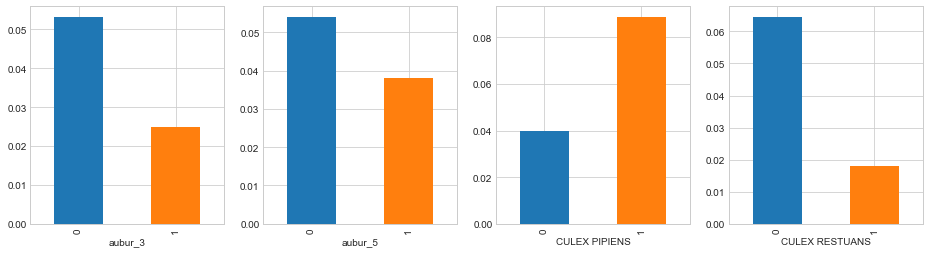

In [18]:
for i, col in enumerate(discrete_cols):
   # print(i, col)
    if i%4 == 0:
        f, ax = plt.subplots(1, 4, figsize=(16, 4))
    df.groupby([col])['WnvPresent'].mean().plot.bar(grid=True, ax=ax[i%4])
    
    if i%4 == 3:
        plt.show()

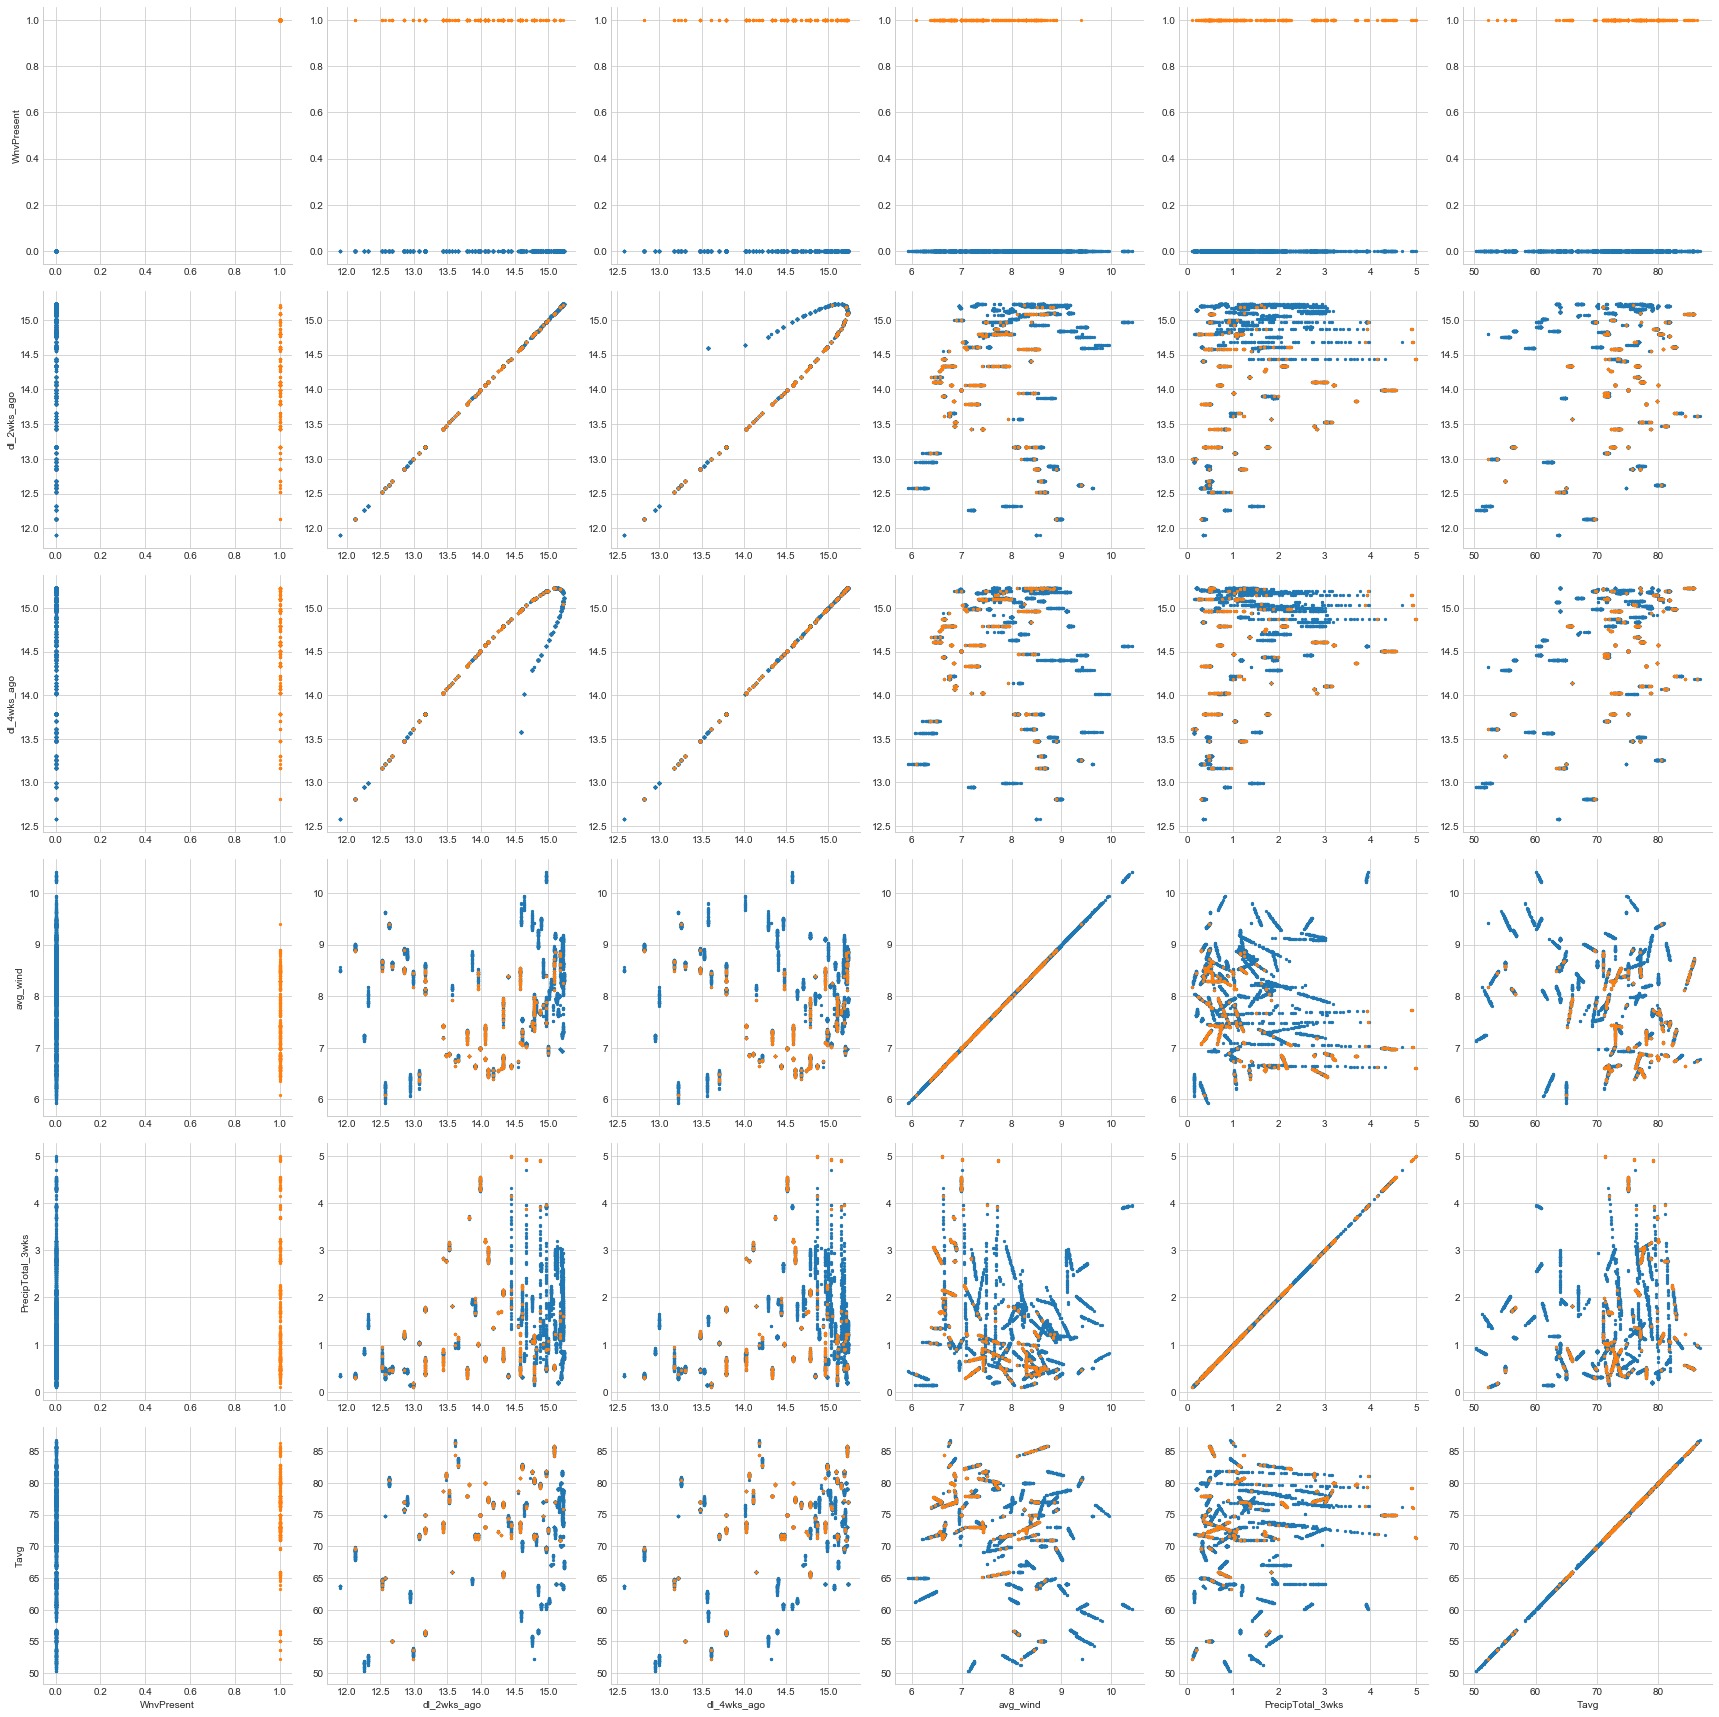

In [21]:
plt.figure(figsize=(15,15))
wnv = df[['WnvPresent'] + final_cols[20:25]].drop_duplicates()
g1 = sns.PairGrid(wnv, hue="WnvPresent", size=4)
g1.map(plt.scatter, s=5)

In [24]:
wnv_by_year = all_train[['Date', 'Trap', 'WnvPresent']].groupby(
        by = ['Date','Trap'])['Date','Trap','WnvPresent'].sum().reset_index().sort_values(
        'WnvPresent', ascending = False).set_index('Date')

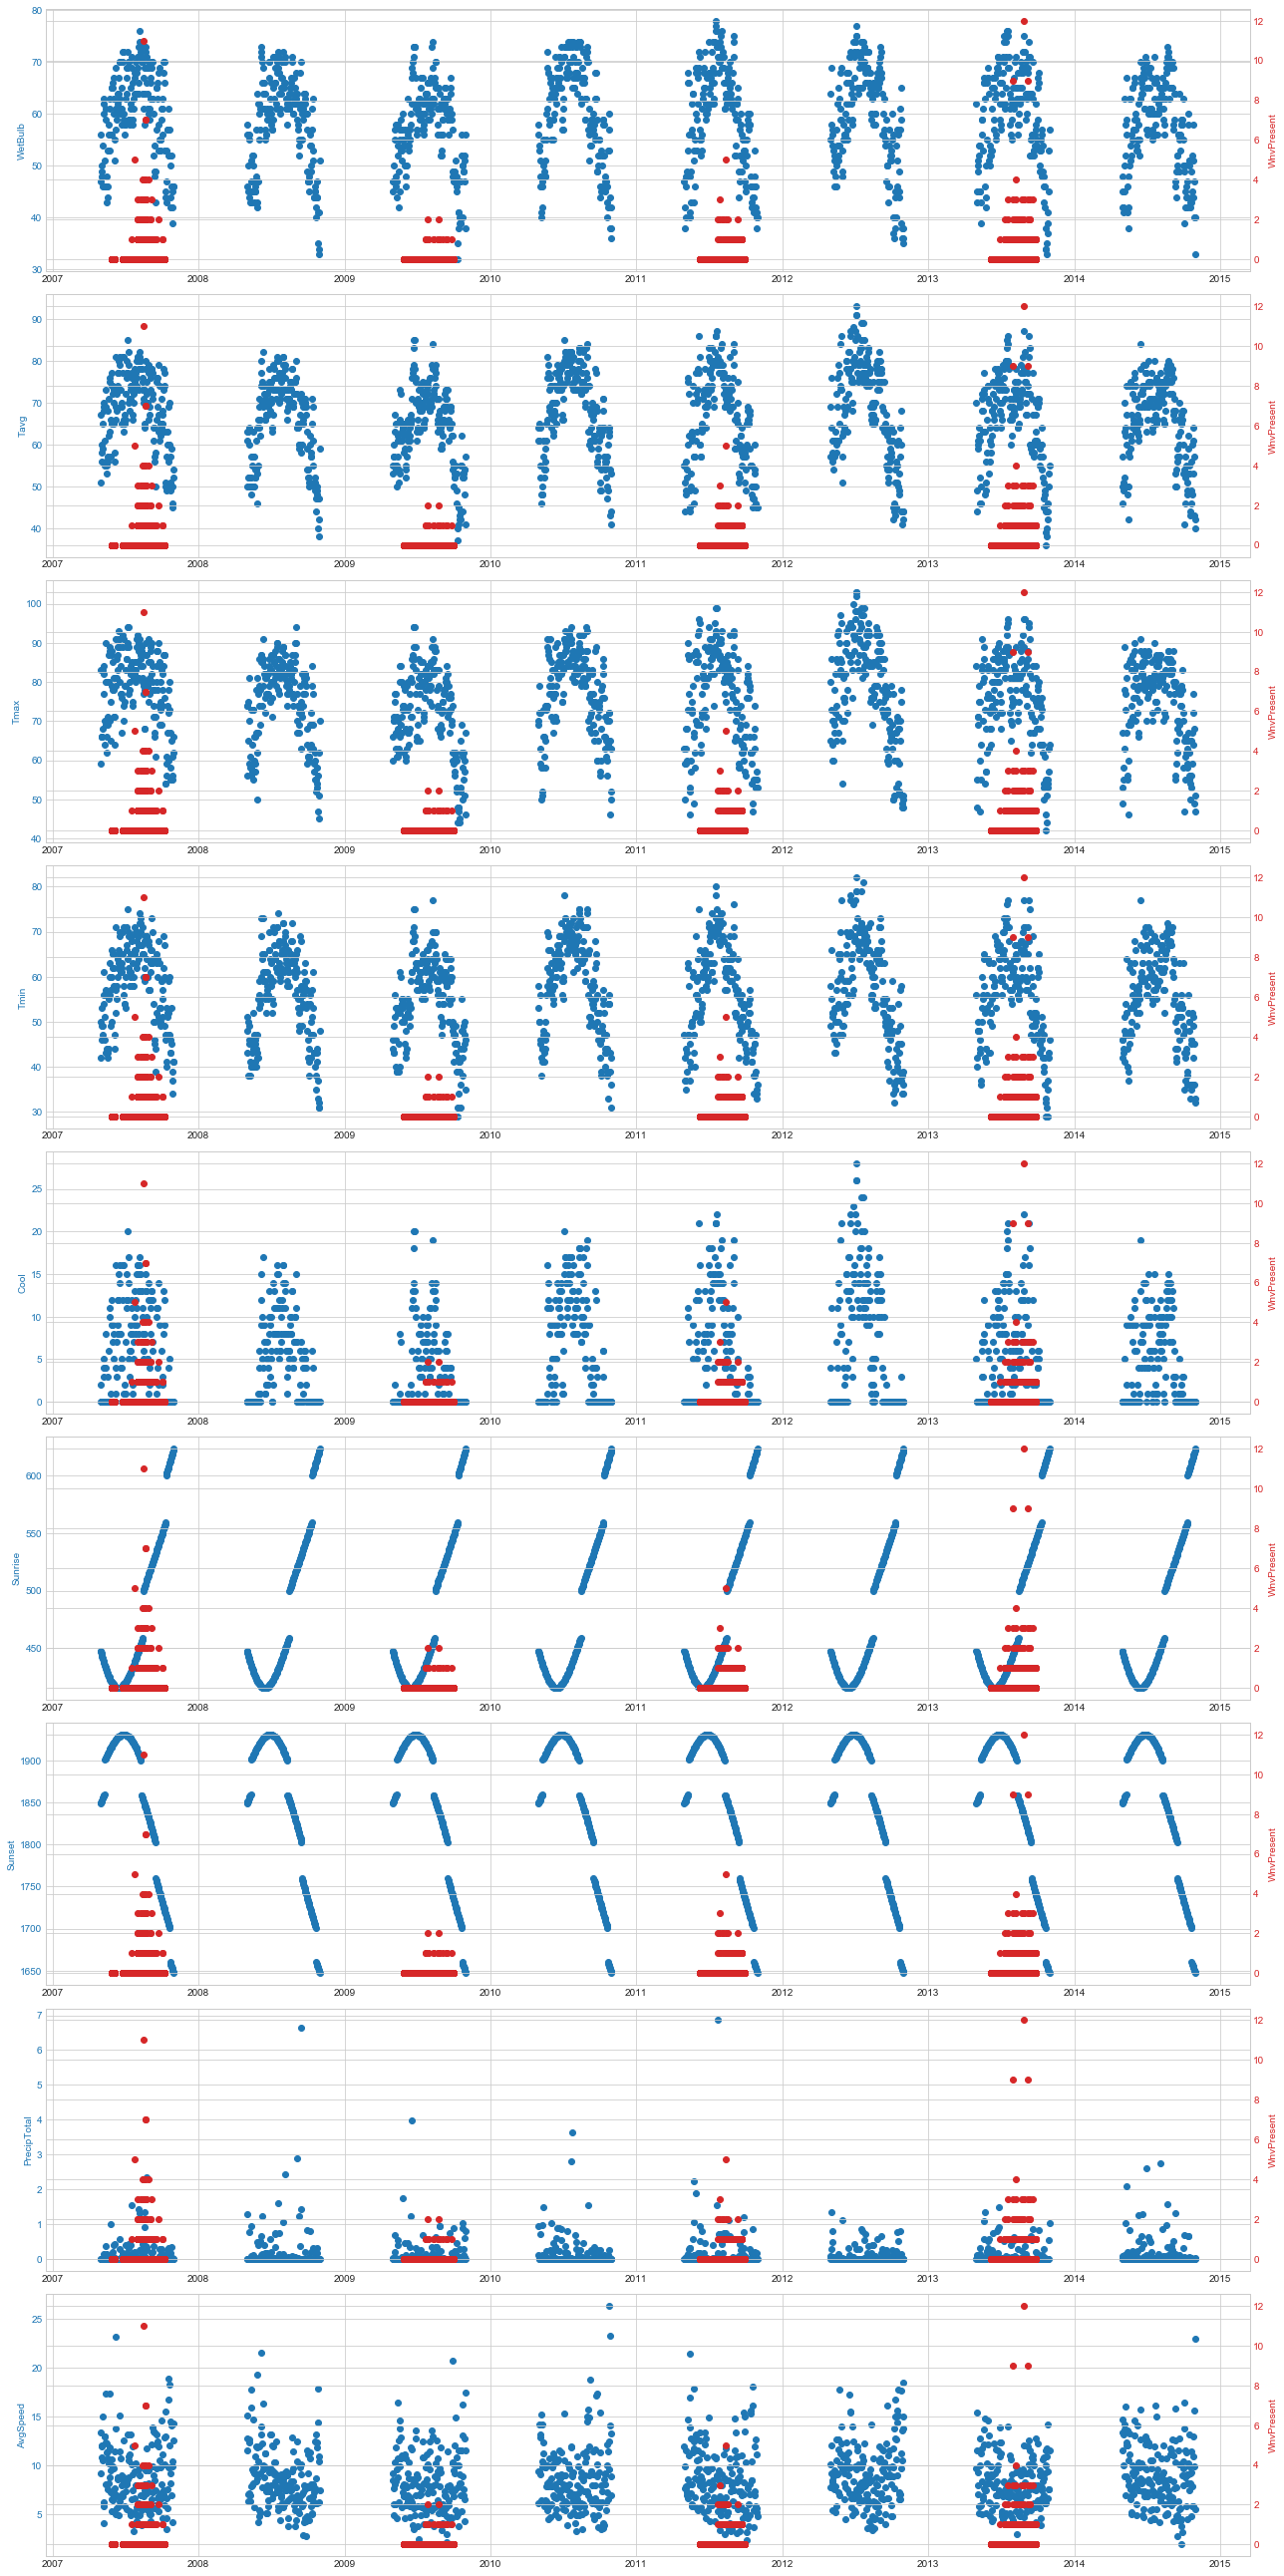

In [30]:
prep2_utils.plot_weather_features(weather_stat1, prep2_utils.weather_cols[2:], wnv_by_year)

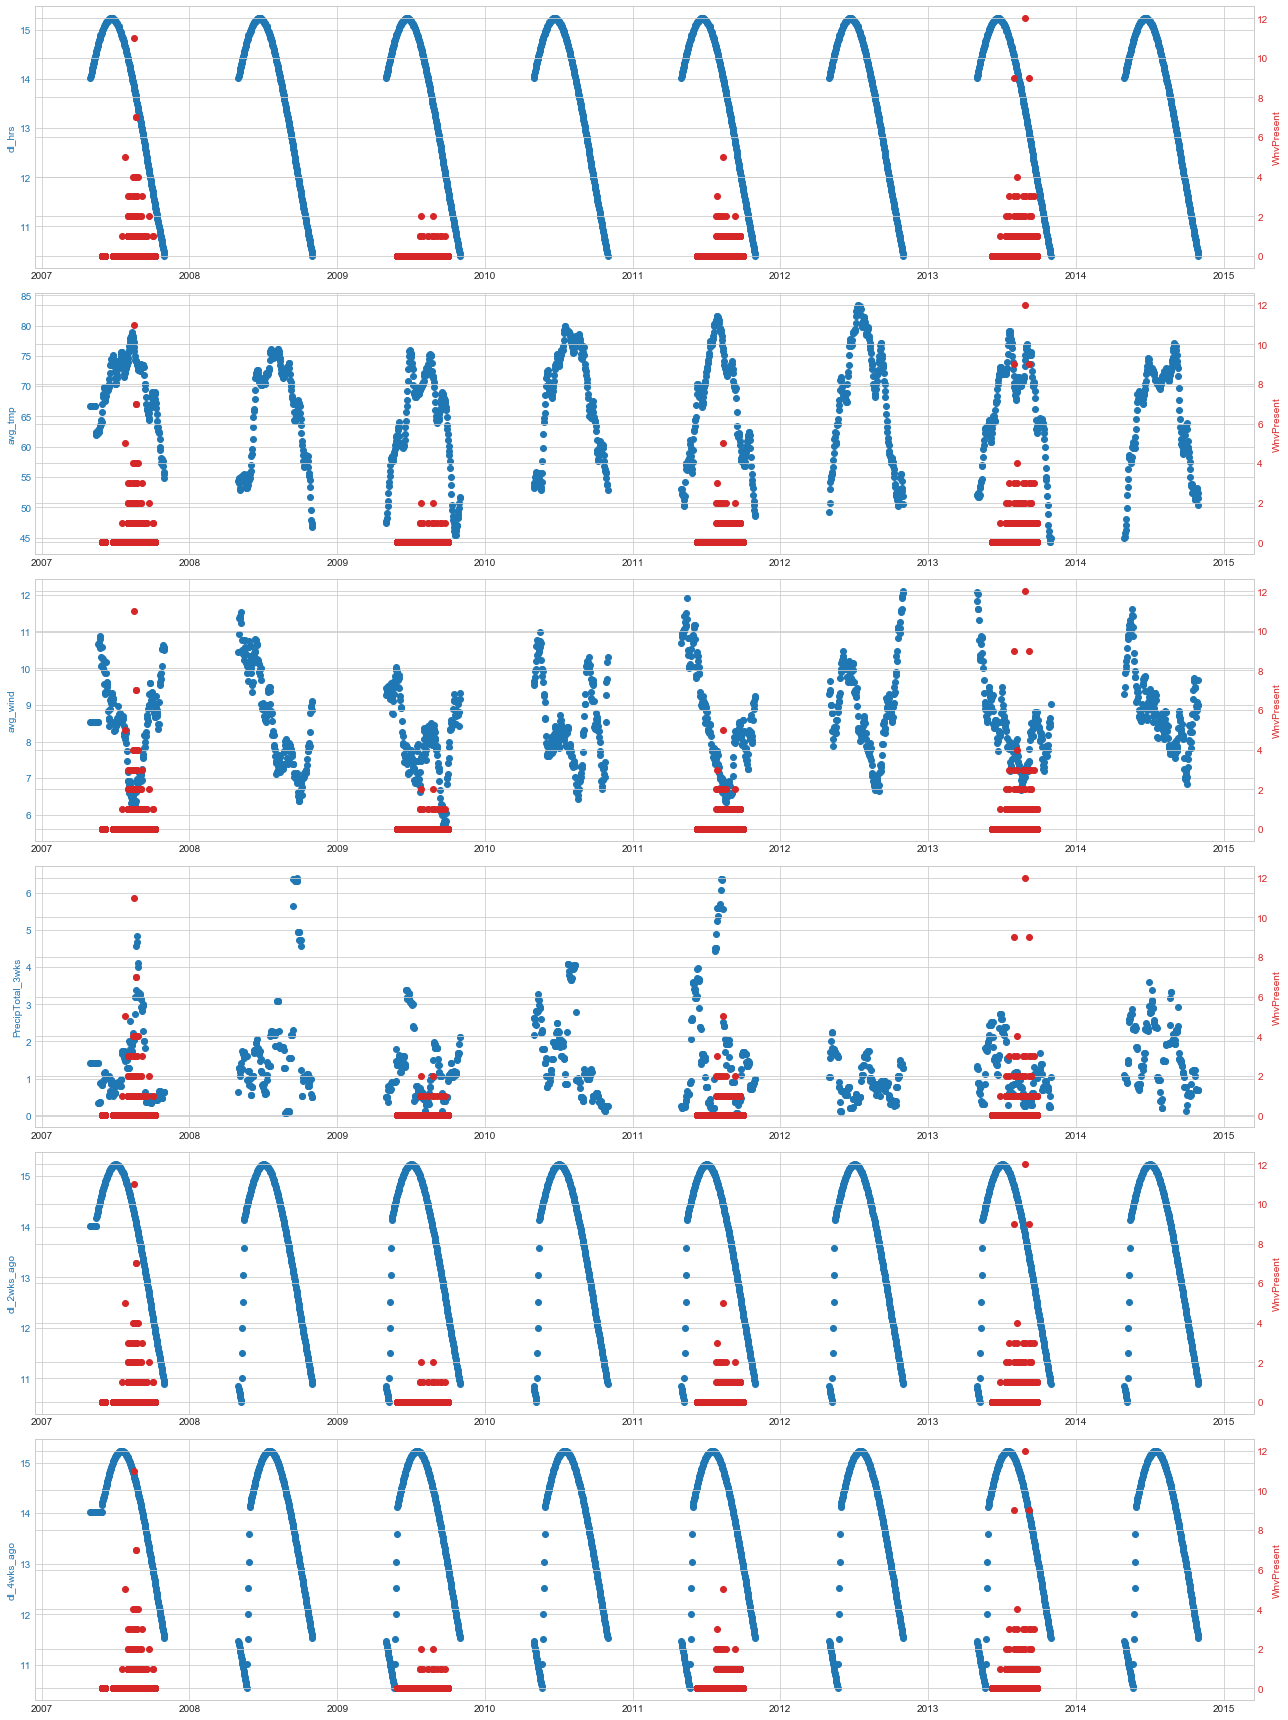

In [31]:
prep2_utils.plot_weather_features(weather_stat1, prep2_utils.weather_features, wnv_by_year)

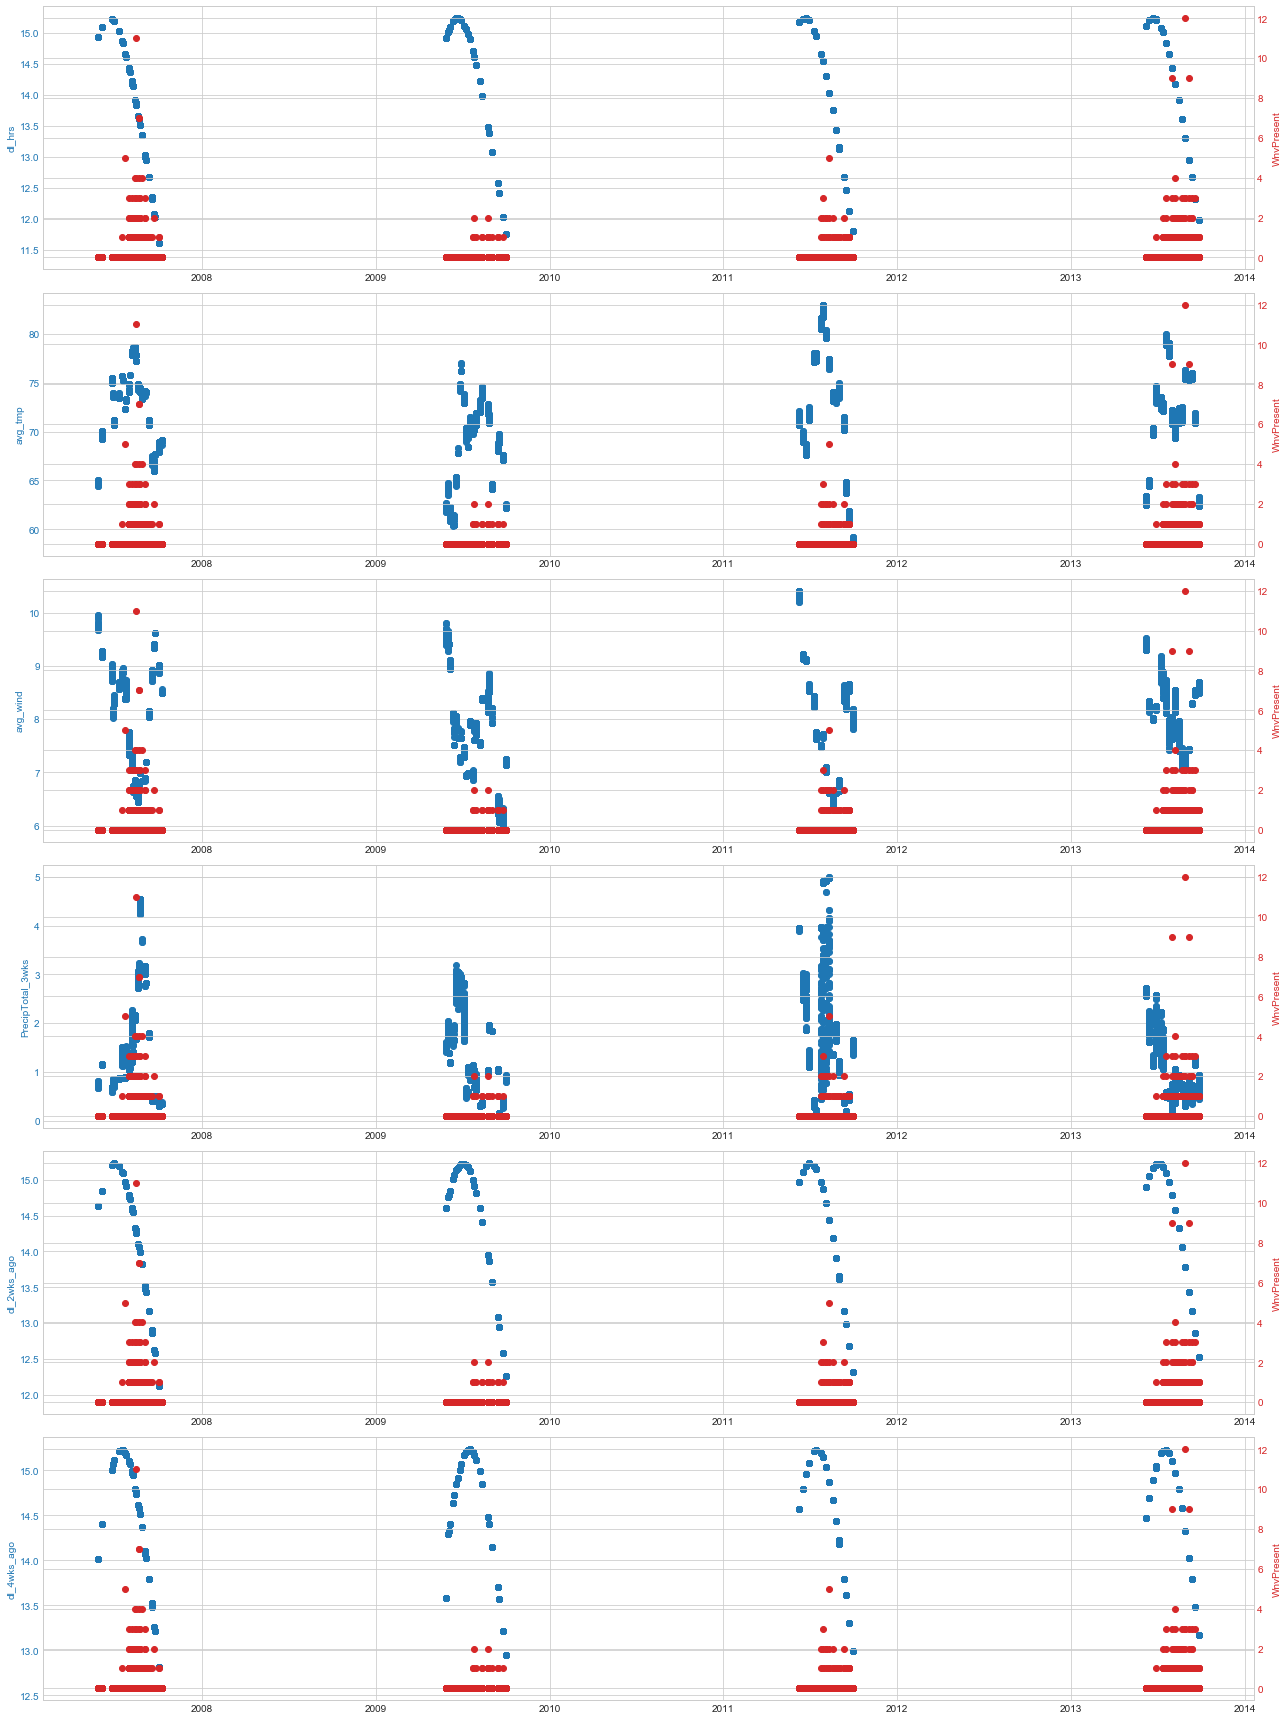

In [32]:
prep2_utils.plot_weather_features(df, prep2_utils.weather_features, wnv_by_year)

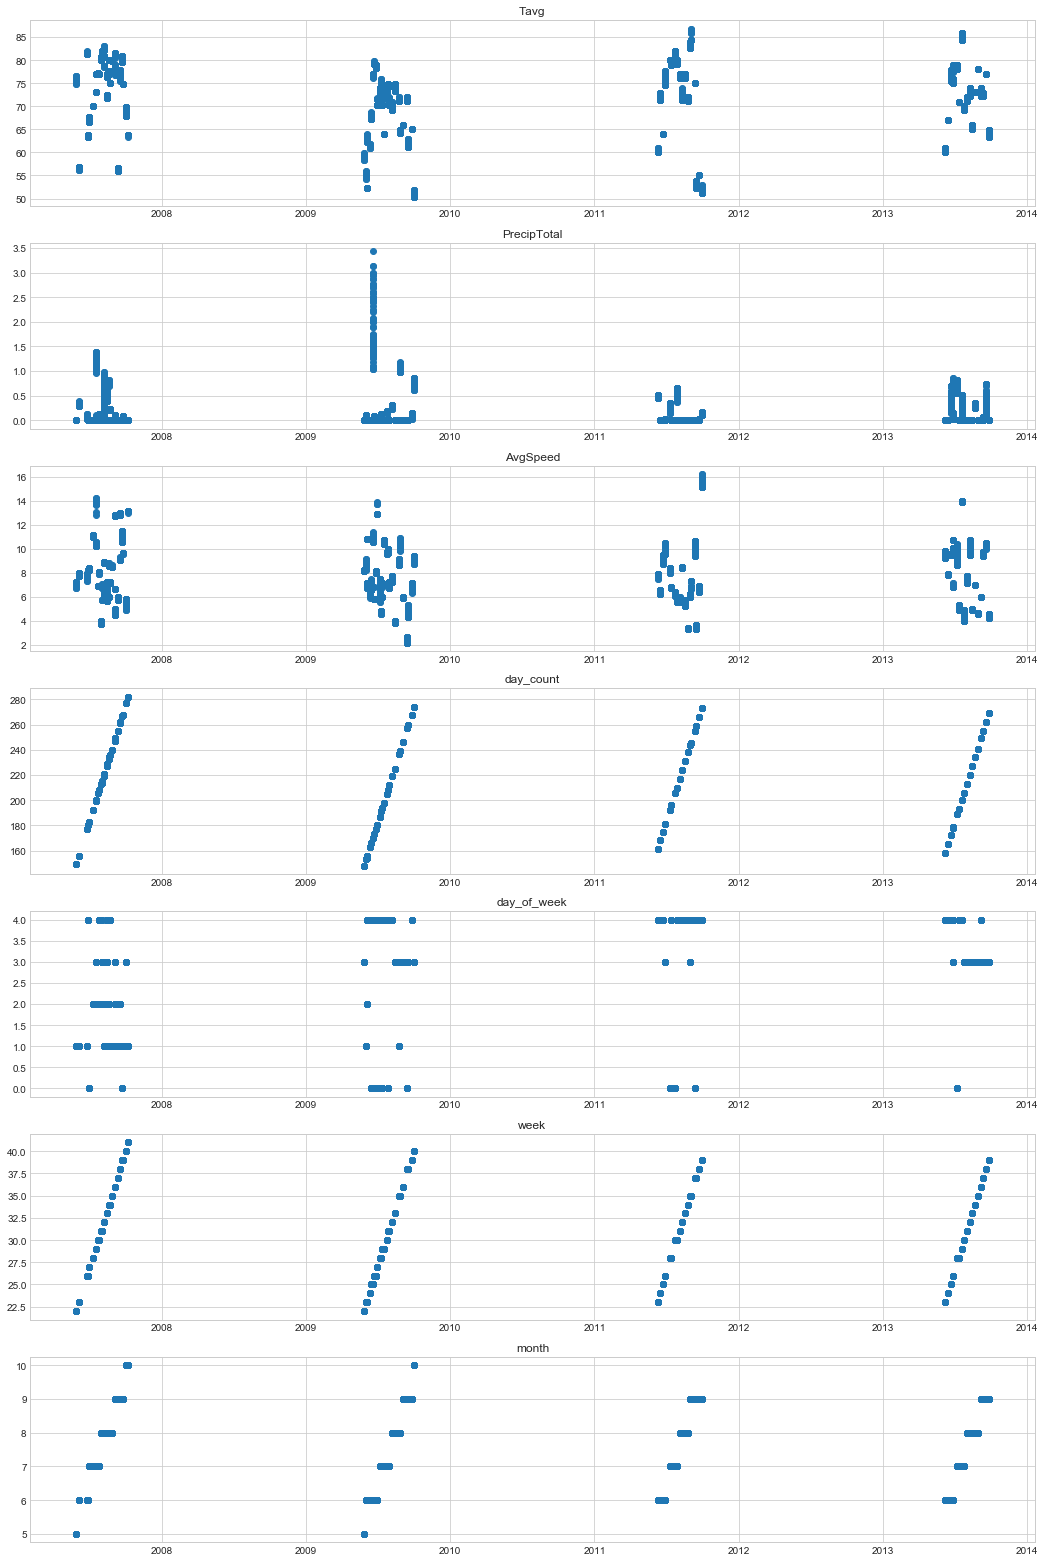

In [35]:
import dexplor_utils
dexplor_utils.plot_weather_features(
    df, ['Tavg', 'PrecipTotal', 'AvgSpeed', 'day_count', 'day_of_week', 'week' ,'month'])

In [93]:
np.sum([True for t in x_train.Trap.unique() if t in test.Trap.unique().tolist()]) == len(x_train.Trap.unique())

True

In [103]:
for col in x_train.columns.tolist():
    print(col, weather_stat1[col].isnull().sum(), weather[col].isnull().sum())
np.sum(org_weather['PrecipTotal'] == '  T')

Tavg 1104 0
Sunrise 1104 0
Sunset 1104 0
PrecipTotal 1104 0
AvgSpeed 1104 0


318

In [106]:
weather.shape, spray.shape, x_train.shape, test.shape, y_train.shape

((2944, 7), (14835, 4), (10506, 20), (116293, 23), (10506, 1))